# SPAM Benchmarks, Analysis

In [1]:
import sys
sys.path.insert(0, '../../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_channel import *
from quantum_tools import *
from experimental import *
from spam import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

## Plot

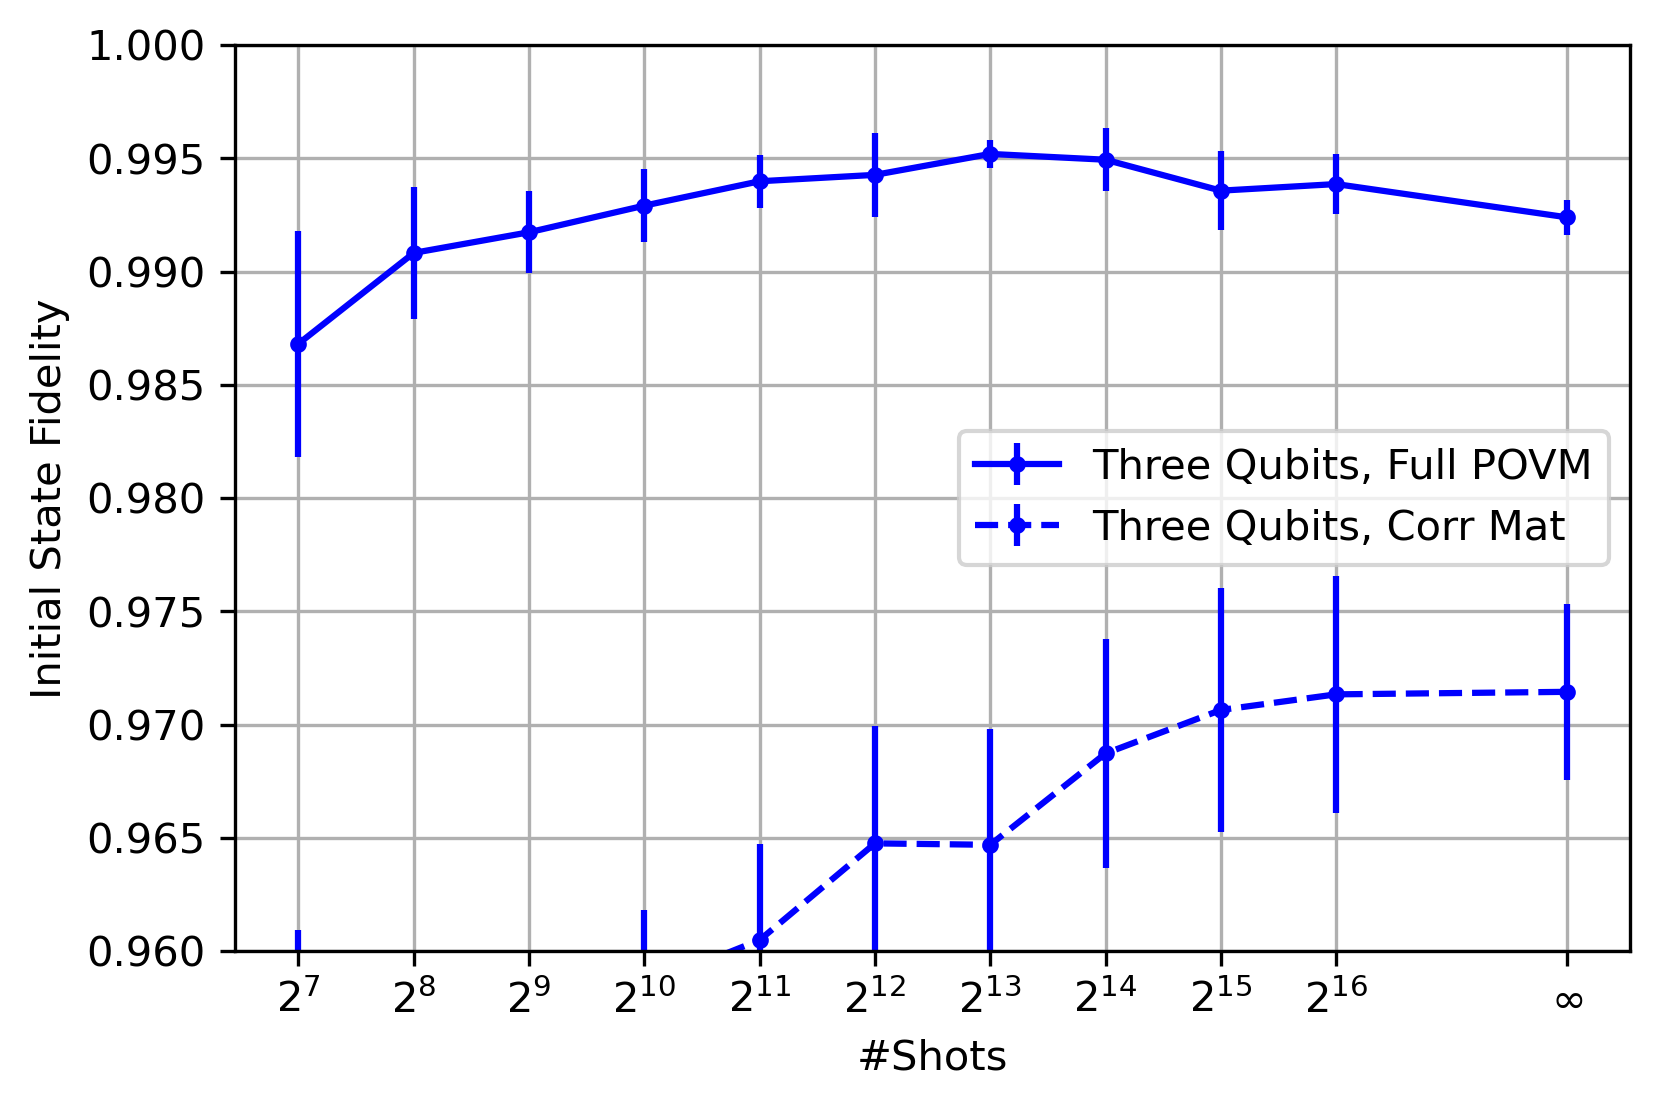

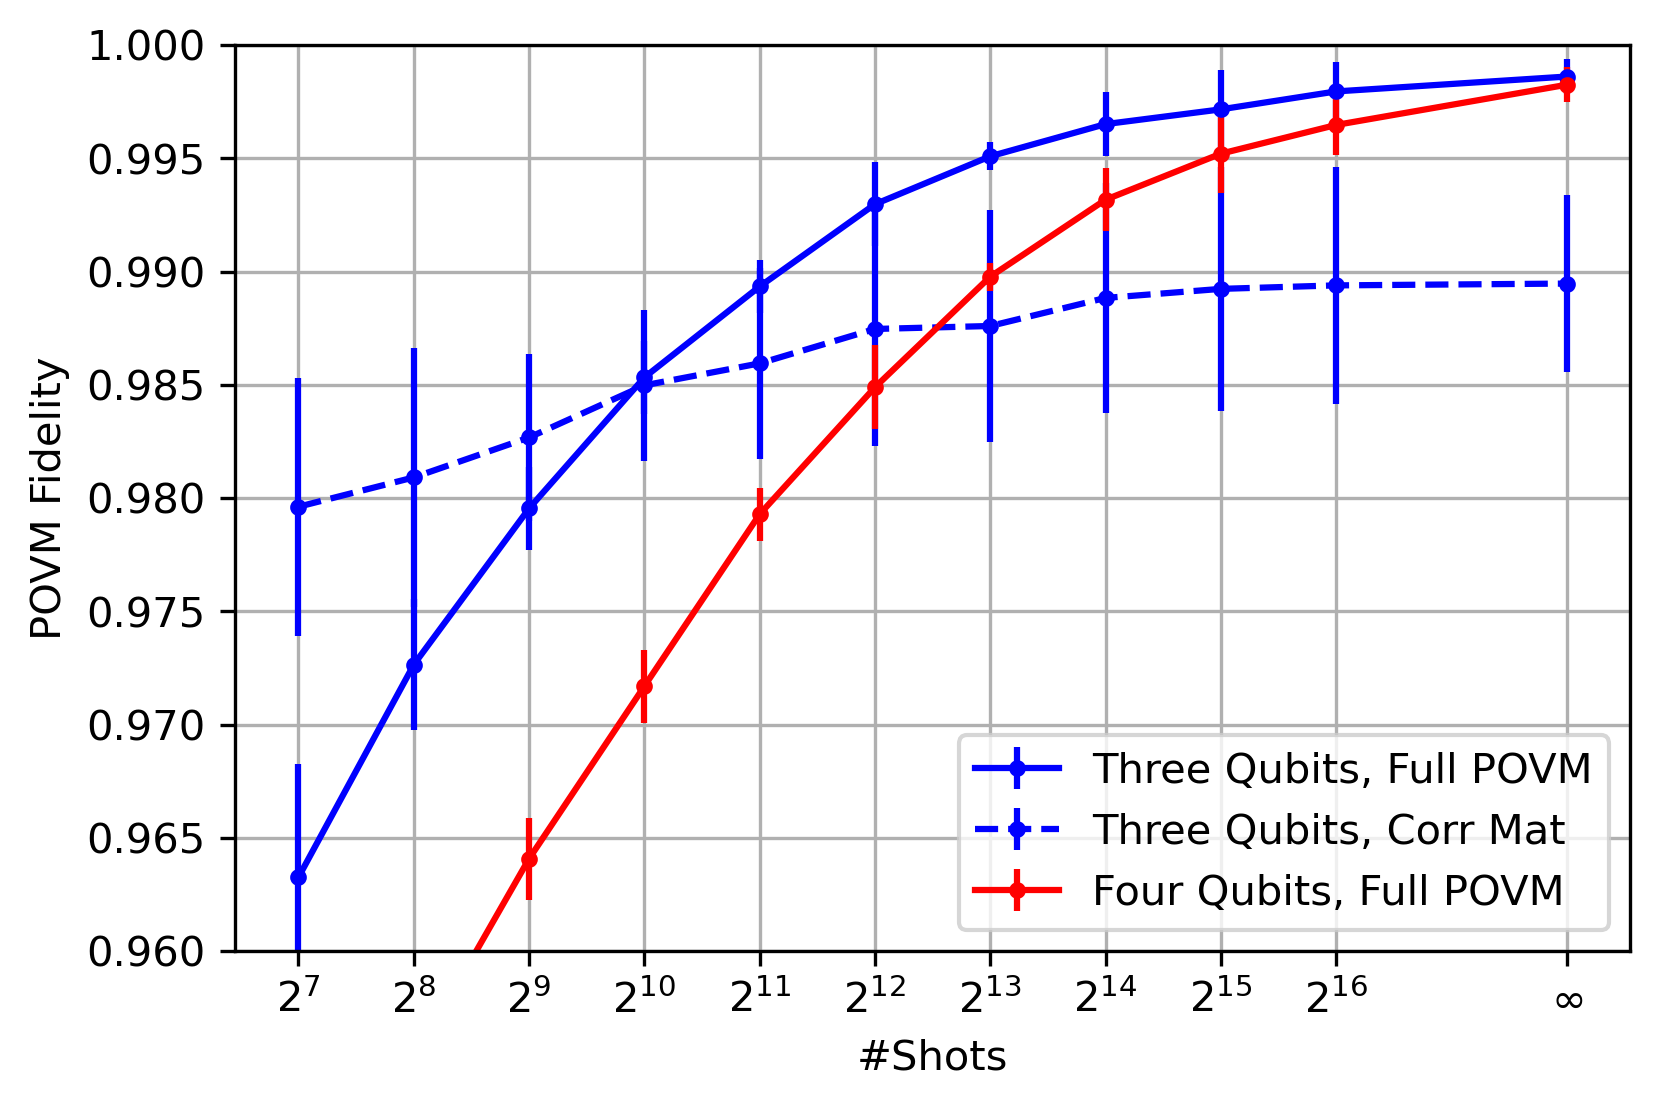

In [11]:
init_fid_list1, povm_fid_list1 = loader("data/spam_fidelity_3qubit_full_shotnoise.data")
init_fid_list2, povm_fid_list2 = loader("data/spam_fidelity_3qubit_corr_shotnoise.data")
init_fid_list3, povm_fid_list3 = loader("data/spam_fidelity_4qubit_full_shotnoise.data")
#init_fid_list4, povm_fid_list4 = loader("data/spam_fidelity_4qubit_corr_retry.data")


init_fid_mean1 = np.mean(init_fid_list1, axis=1)
povm_fid_mean1 = np.mean(povm_fid_list1, axis=1)
init_fid_std1 = np.std(init_fid_list1, axis=1)
povm_fid_std1 = np.std(povm_fid_list1, axis=1)


init_fid_mean2 = np.mean(init_fid_list2, axis=1)
povm_fid_mean2 = np.mean(povm_fid_list2, axis=1)
init_fid_std2 = np.std(init_fid_list2, axis=1)
povm_fid_std2 = np.std(povm_fid_list2, axis=1)


init_fid_mean3 = np.mean(init_fid_list3, axis=1)
povm_fid_mean3 = np.mean(povm_fid_list3, axis=1)
init_fid_std3 = np.std(init_fid_list3, axis=1)
povm_fid_std3 = np.std(povm_fid_list3, axis=1)


#init_fid_mean4 = np.mean(init_fid_list4, axis=1)
#povm_fid_mean4 = np.mean(povm_fid_list4, axis=1)
#init_fid_std4 = np.std(init_fid_list4, axis=1)
#povm_fid_std4 = np.std(povm_fid_list4, axis=1)


x_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11]
fig = plt.figure(figsize=(6, 4), dpi=300, facecolor="w", edgecolor="k")
plt.errorbar(x_list, init_fid_mean1, yerr=init_fid_std1, fmt="bo-", markersize=3)
plt.errorbar(x_list, init_fid_mean2, yerr=init_fid_std2, fmt="bo--", markersize=3)

#plt.errorbar(x_list, init_fid_mean3, yerr=init_fid_std1, fmt="ro-", markersize=3)
#plt.errorbar(x_list, init_fid_mean4, yerr=init_fid_std2, fmt="ro--", markersize=3)


ticks_list = x_list
labels = ["$2^7$", "$2^8$", "$2^9$", "$2^{10}$", "$2^{11}$", "$2^{12}$", "$2^{13}$", "$2^{14}$","$2^{15}$","$2^{16}$", "$\infty$"]

plt.xticks(ticks_list, labels)
plt.xlabel("#Shots")
plt.ylabel("Initial State Fidelity")
plt.ylim([0.96, 1.0])
plt.legend(["Three Qubits, Full POVM", "Three Qubits, Corr Mat", "Four Qubits, Full POVM", "Four Qubits, Corr Mat"])
plt.grid()
plt.savefig("figures/initial_state_fidelity.pdf", bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(6, 4), dpi=300, facecolor="w", edgecolor="k")
plt.errorbar(x_list, povm_fid_mean1, yerr=init_fid_std1, fmt="bo-", markersize=3)
plt.errorbar(x_list, povm_fid_mean2, yerr=init_fid_std2, fmt="bo--", markersize=3)

plt.errorbar(x_list, povm_fid_mean3, yerr=init_fid_std1, fmt="ro-", markersize=3)
#plt.errorbar(x_list, povm_fid_mean4, yerr=init_fid_std2, fmt="ro--", markersize=3)


plt.xticks(ticks_list, labels)
plt.xlabel("#Shots")
plt.ylabel("POVM Fidelity")
plt.legend(["Three Qubits, Full POVM", "Three Qubits, Corr Mat", "Four Qubits, Full POVM", "Four Qubits, Corr Mat"])
plt.ylim([0.96, 1.0])
plt.grid()
plt.savefig("figures/povm_fidelity.pdf", bbox_inches='tight')
plt.show()

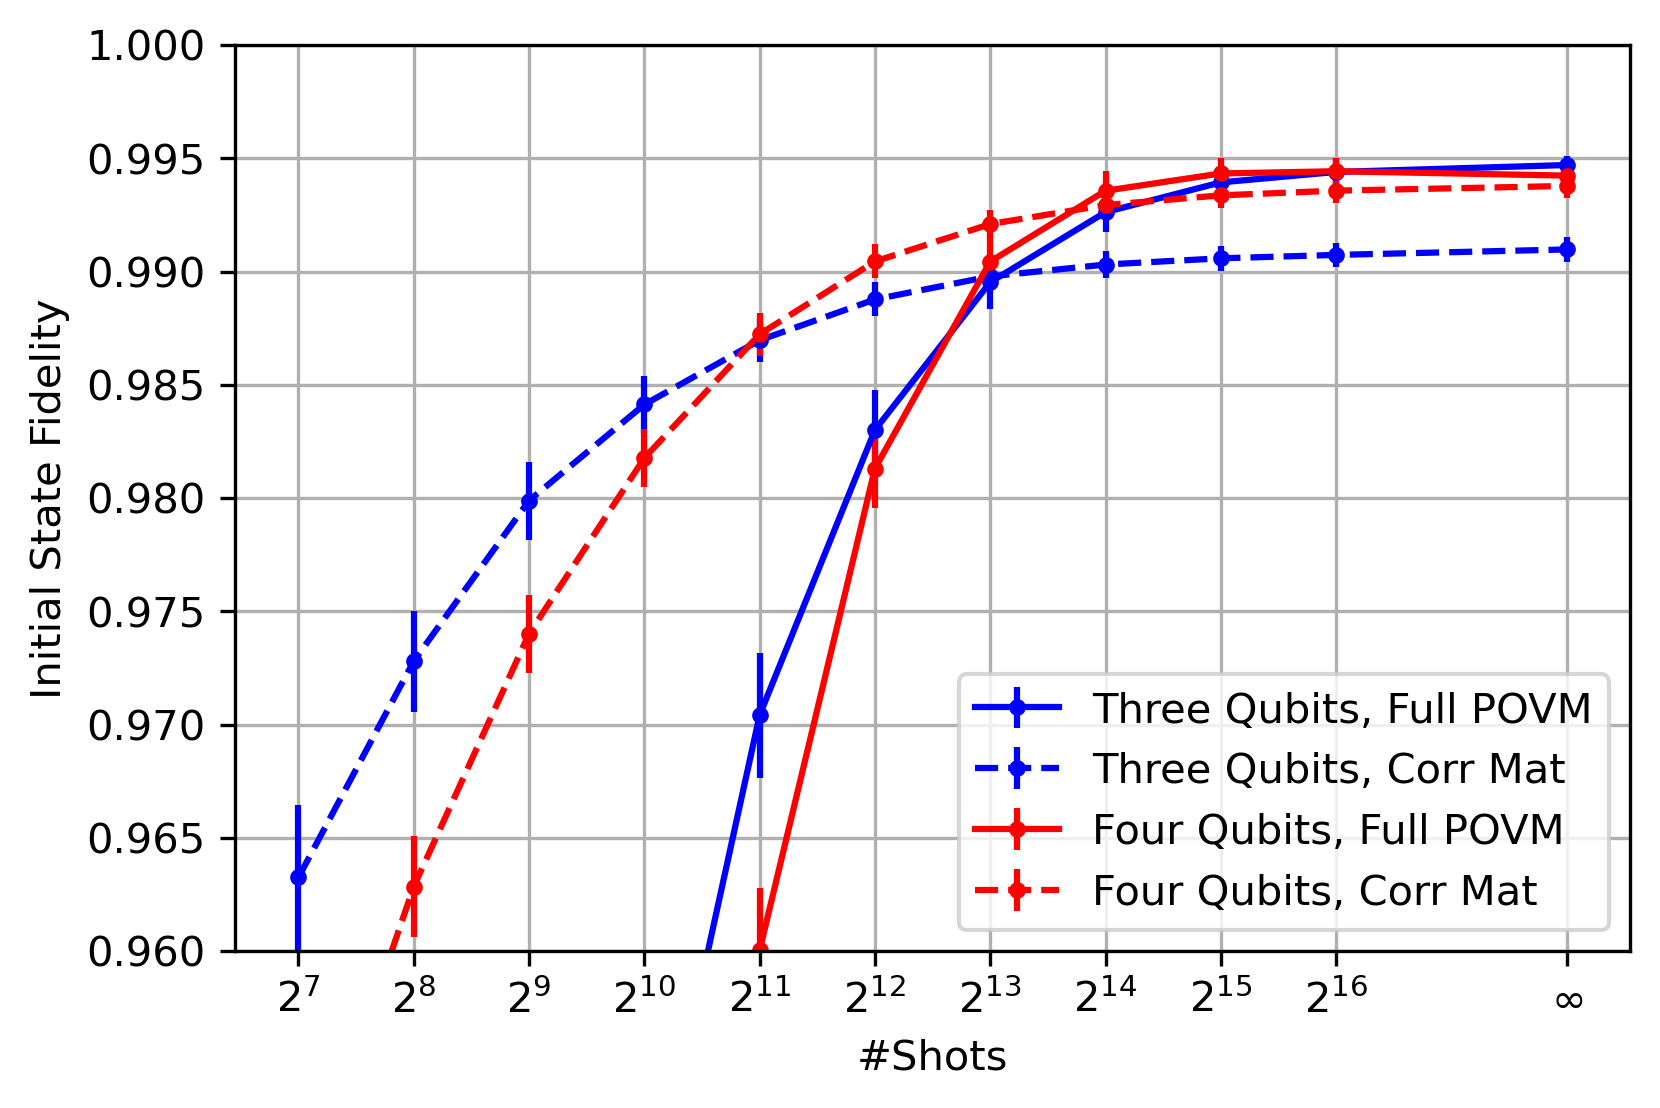

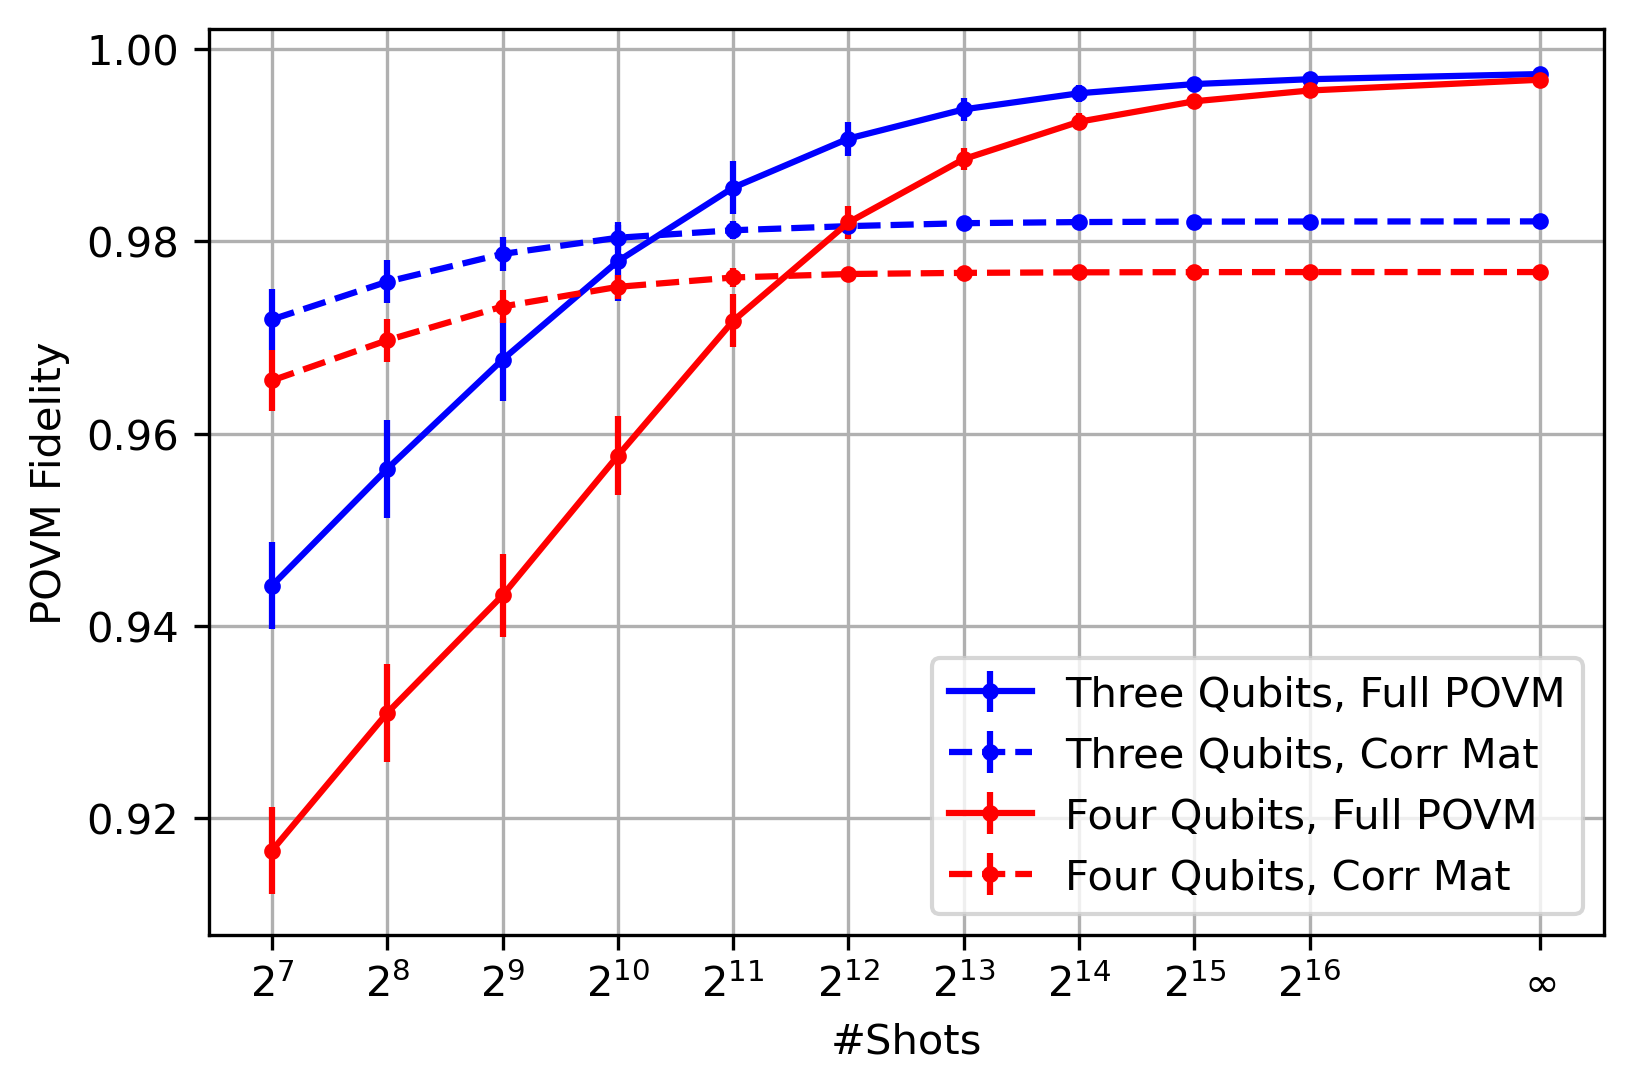

In [5]:
init_fid_list1, povm_fid_list1 = loader(data_path("spam_fidelity_3qubit_full_retry.data"))
init_fid_list2, povm_fid_list2 = loader(data_path("spam_fidelity_3qubit_corr_retry.data"))
init_fid_list3, povm_fid_list3 = loader(data_path("spam_fidelity_4qubit_full_retry.data"))
init_fid_list4, povm_fid_list4 = loader(data_path("spam_fidelity_4qubit_corr_retry.data"))


init_fid_mean1 = np.mean(init_fid_list1, axis=1)
povm_fid_mean1 = np.mean(povm_fid_list1, axis=1)
init_fid_std1 = np.std(init_fid_list1, axis=1)/np.sqrt(10)
povm_fid_std1 = np.std(povm_fid_list1, axis=1)/np.sqrt(10)


init_fid_mean2 = np.mean(init_fid_list2, axis=1)
povm_fid_mean2 = np.mean(povm_fid_list2, axis=1)
init_fid_std2 = np.std(init_fid_list2, axis=1)/np.sqrt(10)
povm_fid_std2 = np.std(povm_fid_list2, axis=1)/np.sqrt(10)


init_fid_mean3 = np.mean(init_fid_list3, axis=1)
povm_fid_mean3 = np.mean(povm_fid_list3, axis=1)
init_fid_std3 = np.std(init_fid_list3, axis=1)/np.sqrt(10)
povm_fid_std3 = np.std(povm_fid_list3, axis=1)/np.sqrt(10)


init_fid_mean4 = np.mean(init_fid_list4, axis=1)
povm_fid_mean4 = np.mean(povm_fid_list4, axis=1)
init_fid_std4 = np.std(init_fid_list4, axis=1)/np.sqrt(10)
povm_fid_std4 = np.std(povm_fid_list4, axis=1)/np.sqrt(10)


x_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11]
fig = plt.figure(figsize=(6, 4), dpi=300, facecolor="w", edgecolor="k")
plt.errorbar(x_list, init_fid_mean1, yerr=init_fid_std1, fmt="bo-", markersize=3)
plt.errorbar(x_list, init_fid_mean2, yerr=init_fid_std2, fmt="bo--", markersize=3)

plt.errorbar(x_list, init_fid_mean3, yerr=init_fid_std1, fmt="ro-", markersize=3)
plt.errorbar(x_list, init_fid_mean4, yerr=init_fid_std2, fmt="ro--", markersize=3)


ticks_list = x_list
labels = ["$2^7$", "$2^8$", "$2^9$", "$2^{10}$", "$2^{11}$", "$2^{12}$", "$2^{13}$", "$2^{14}$","$2^{15}$","$2^{16}$", "$\infty$"]

plt.xticks(ticks_list, labels)
plt.xlabel("#Shots")
plt.ylabel("Initial State Fidelity")
plt.ylim([0.96, 1.0])
plt.legend(["Three Qubits, Full POVM", "Three Qubits, Corr Mat", "Four Qubits, Full POVM", "Four Qubits, Corr Mat"])
plt.grid()
plt.savefig(image_path("initial_state_fidelity.pdf"), bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(6, 4), dpi=300, facecolor="w", edgecolor="k")
plt.errorbar(x_list, povm_fid_mean1, yerr=init_fid_std1, fmt="bo-", markersize=3)
plt.errorbar(x_list, povm_fid_mean2, yerr=init_fid_std2, fmt="bo--", markersize=3)

plt.errorbar(x_list, povm_fid_mean3, yerr=init_fid_std1, fmt="ro-", markersize=3)
plt.errorbar(x_list, povm_fid_mean4, yerr=init_fid_std2, fmt="ro--", markersize=3)


plt.xticks(ticks_list, labels)
plt.xlabel("#Shots")
plt.ylabel("POVM Fidelity")
plt.legend(["Three Qubits, Full POVM", "Three Qubits, Corr Mat", "Four Qubits, Full POVM", "Four Qubits, Corr Mat"])
plt.grid()

plt.show()